In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
    ### reading the dataset
    df_actual=pd.read_csv("..\Desktop\AirPassengersImpute.csv",index_col=[0])
    df_actual['index']=pd.date_range(start='1949/01/01',end='1961',freq='M')
    df_actual.set_index('index',inplace=True)
    df_actual = df_actual.rename(columns={'x': 'Passengers'})
    df_actual

,Passengers
index,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0
...,...
1960-08-31,606.0
1960-09-30,NaN
1960-10-31,NaN


In [3]:
df_actual['Passengers']

index
1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31    121.0
              ...  
1960-08-31    606.0
1960-09-30      NaN
1960-10-31      NaN
1960-11-30    390.0
1960-12-31    432.0
Name: Passengers, Length: 144, dtype: float64

In [183]:
#Missing Values in the dataset
df_actual['Passengers'].isnull().sum()
print('percentage of missing values: ',round((df_actual['Passengers'].isnull().sum()/len(df_actual))*100,2),'%')

percentage of missing values:  8.33 %


# Filling the missing values

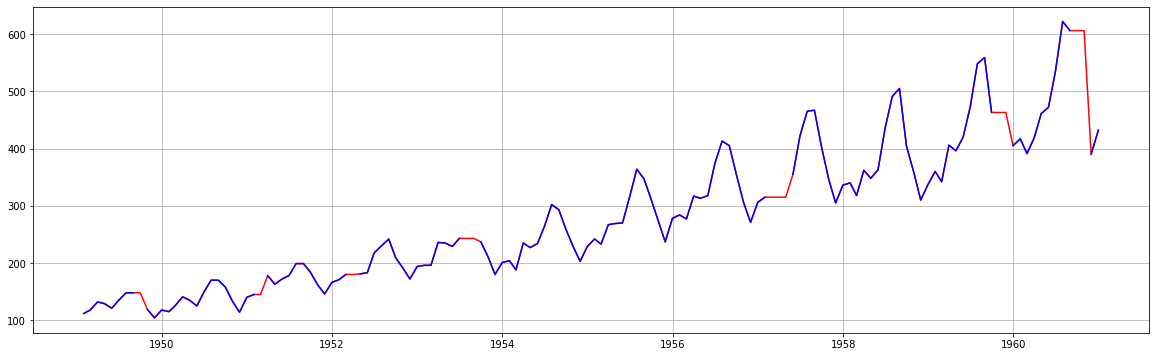

In [159]:
#Forward Filling
df2=df_actual.ffill()
fig=plt.figure(figsize=(20,6))
plt.plot(df2['Passengers'],color="red")
plt.plot(df_actual['Passengers'],color="blue")
plt.grid()
plt.show()

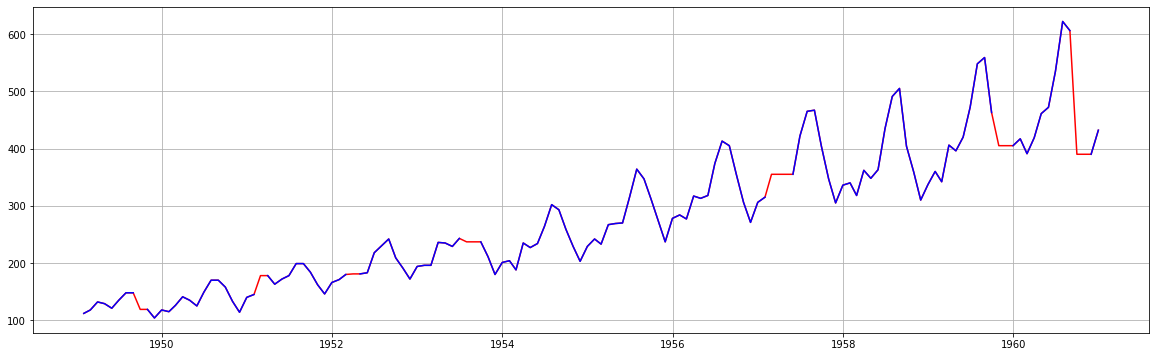

In [184]:
#Backward Filling
df2=df_actual.bfill()
fig=plt.figure(figsize=(20,6))
plt.plot(df2['Passengers'],color="red")
plt.plot(df_actual['Passengers'],color="blue")
plt.grid()
plt.show()

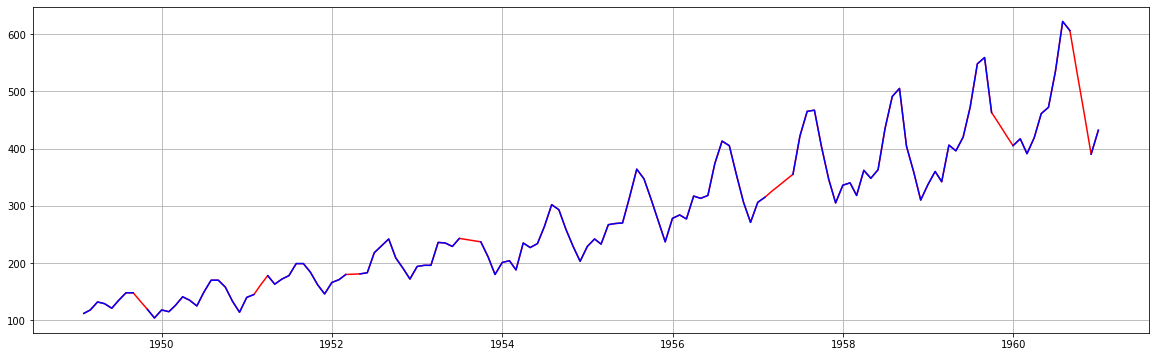

In [130]:
# Filling missing values using interpolate
df1=df_actual.interpolate()
fig=plt.figure(figsize=(20,6))
plt.plot(df1['Passengers'],color="red")
plt.plot(df_actual['Passengers'],color="blue")
plt.grid()
plt.show()

In [185]:
#Converting Float data type to int
df1['Passengers']=df1['Passengers'].astype('int')
df1

,Passengers
index,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,534
1960-10-31,462


# Decomposing the dataset

In [186]:
#Decomposing the dataset
from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(df1) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

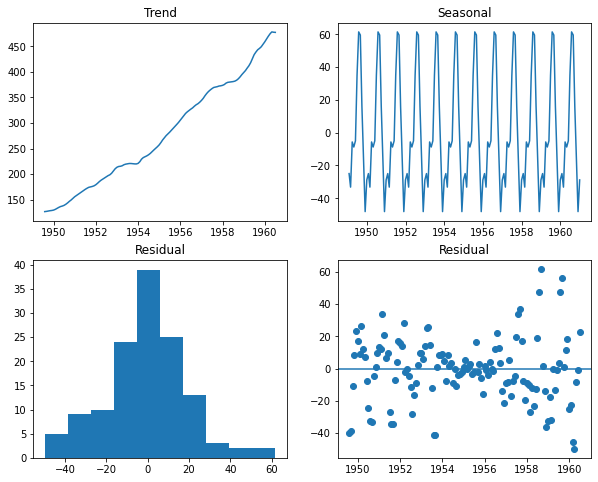

In [187]:
#plotting the Trend ,seasonal ,Residual in the dataset
fig = plt.figure(figsize=(10,8))
axes1 = plt.subplot(2, 2, 1, title='Trend')
axes1.plot(df1.index,sampleTs_trend)
axes2 = plt.subplot(2, 2, 2, title='Seasonal')
axes2.plot(df1.index,sampleTs_seasonal)
axes3 = plt.subplot(2, 2, 3, title='Residual')
axes3.hist(sampleTs_residual)
axes4 = plt.subplot(2, 2, 4, title='Residual')
axes4.scatter(df1.index,sampleTs_residual)
axes4.axhline(0)
plt.show()

C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.14386821709009553

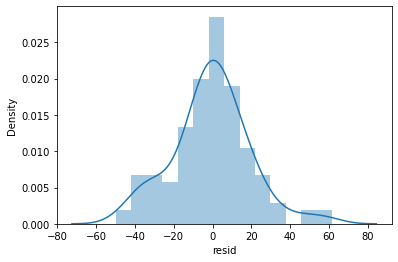

In [188]:
import seaborn as sns
sns.distplot(sampleTs_residual)
sampleTs_residual.skew()

## Homoscedaticity Check

In [189]:
#Generating the Time Periods
df_curr=df1.copy()
df_curr['Time_Period'] = range(1, len(df_curr)+1)
df_curr

,Passengers,Time_Period
index,,
1949-01-31,112,1
1949-02-28,118,2
1949-03-31,132,3
1949-04-30,129,4
1949-05-31,121,5
...,...,...
1960-08-31,606,140
1960-09-30,534,141
1960-10-31,462,142


In [190]:
#Heteroskedasticity
#Null Hypothesis (H0): Homoscedasticity is present
#Alternate Hypothesis (H1) : Heteroskedasticy is present
import statsmodels.formula.api as smf
fit = smf.ols('Passengers ~ Time_Period', data=df_curr).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     869.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           2.11e-62
Time:                        18:37:24   Log-Likelihood:                -753.19
No. Observations:                 144   AIC:                             1510.
Df Residuals:                     142   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      85.5966      7.629     11.219      0.000      70.515     100.679
Time_Period     2.6917      0.091     29.484      0.000       2.511       2.872
==============================================================================
Omnibus:                       23.886   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.450
Skew:                           0.922   Prob(JB):                     8.99e-08
Kurtosis:                       4.418   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 25.1397897305876),
 ('p-value', 5.3321218438378e-07),
 ('f-value', 30.034021760956847),
 ('f p-value', 1.8820399637841257e-07)]

In [192]:
df_curr['Passengers'] = np.log(df_curr['Passengers'])


In [193]:
#Heteroskedasticity
#Null Hypothesis (H0): Homoscedasticity is present
#Alternate Hypothesis (H1) : Heteroskedasticy is present
import statsmodels.formula.api as smf
fit = smf.ols('Passengers ~ Time_Period', data=df_curr).fit()
# fit.summary()

In [194]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 4.336922100713398),
 ('p-value', 0.03729428494004004),
 ('f-value', 4.40948994941524),
 ('f p-value', 0.03750817454628617)]

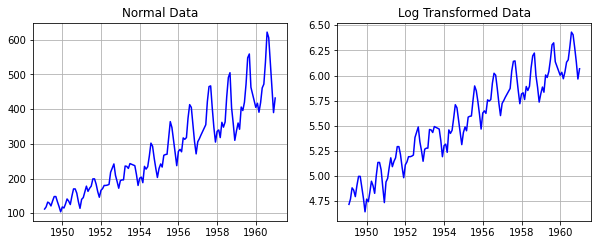

In [169]:
#Taking log for the passengers coloumn and plotting it
fig = plt.figure(figsize=(10,8))
log_df=np.log(df1)
axes1 = plt.subplot(2, 2, 1, title='Normal Data')
axes1.plot(df1['Passengers'],color="Blue")
axes2 = plt.subplot(2, 2, 2, title='Log Transformed Data')
axes2.plot(log_df["Passengers"],color="Blue")
axes1.grid()
axes2.grid()
plt.show()

In [195]:
#Decomposing the dataset
from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(log_df) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

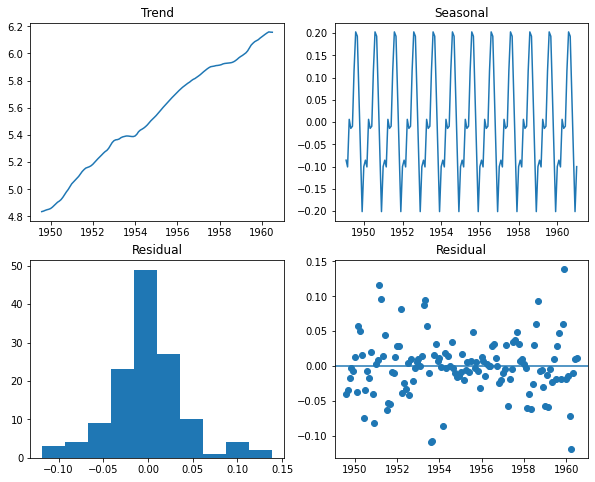

In [171]:
#plotting the Trend ,seasonal ,Residual in the dataset
fig = plt.figure(figsize=(10,8))
axes1 = plt.subplot(2, 2, 1, title='Trend')
axes1.plot(df1.index,sampleTs_trend)
axes2 = plt.subplot(2, 2, 2, title='Seasonal')
axes2.plot(df1.index,sampleTs_seasonal)
axes3 = plt.subplot(2, 2, 3, title='Residual')
axes3.hist(sampleTs_residual)
axes4 = plt.subplot(2, 2, 4, title='Residual')
axes4.scatter(df1.index,sampleTs_residual)
axes4.axhline(0)
plt.show()

In [196]:
from statsmodels.tsa.stattools import adfuller
"""
Hypothesis Test
Ho: It is non stationary.
H1: It is stationary.
"""

def adfuller_test(AirPassengers):
    result = adfuller(AirPassengers)
    labels = ["ADF Test Statistic",'p-value']
    for value,label in zip(result, labels):
        print(label,':',str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary ")


In [197]:
adfuller_test(df1['Passengers'])
df_copy=df1.copy()

ADF Test Statistic : 1.0230946521450934
p-value : 0.9945037448236711
Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary 


In [198]:
df_test=df1.copy()
seasonaled = df_test["Passengers"]- df_test["Passengers"].shift(12)
adfuller_test(seasonaled.dropna())
#seasonaled

ADF Test Statistic : -2.952527559395373
p-value : 0.03957188964269736
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


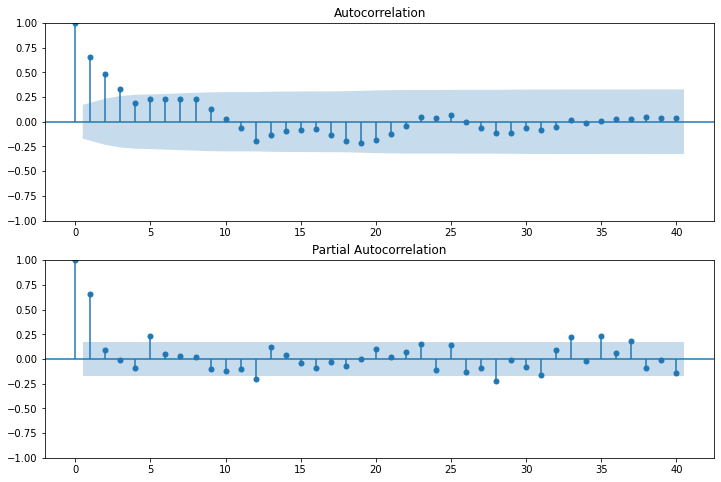

In [199]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig2 = sm.graphics.tsa.plot_acf(seasonaled.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonaled.iloc[13:],lags=40,ax=ax2)

# Predict the future

In [148]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted,_ = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_copy.index[-1], periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    # Plot
    plt.figure(figsize=(20,8))
    plt.plot(df_copy["Passengers"], color='blue')
    plt.plot(fitted_series, color='red')
    plt.title("ARIMA - Forecast of Airline Passengers")
    plt.show()

In [149]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df_copy['Passengers'], 
                      start_p=1, 
                      start_q=1,
                      max_p=1,
                      max_q=3, # maximum p and q
                      d=1,
                      seasonal=True, # No Seasonality for standard ARIMA
                      suppress_warnings=True,
                      stepwise=True)

print(ARIMA_model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -682.657
Date:                Thu, 17 Mar 2022   AIC                           1373.314
Time:                        18:30:29   BIC                           1385.166
Sample:                             0   HQIC                          1378.130
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6036      0.101      5.986      0.000       0.406       0.801
ma.L1         -0.3267      0.105     -3.118      0.002      -0.532      -0.121
ma.L2         -0.4962      0.070     -7.126      0.0

In [150]:
import statsmodels.api as sm
model2 = sm.tsa.statespace.SARIMAX(df_copy["Passengers"], order=(1,1,2),seasonal_order=(1,1,2,12))
model2_fit = model2.fit()

C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\1939907\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


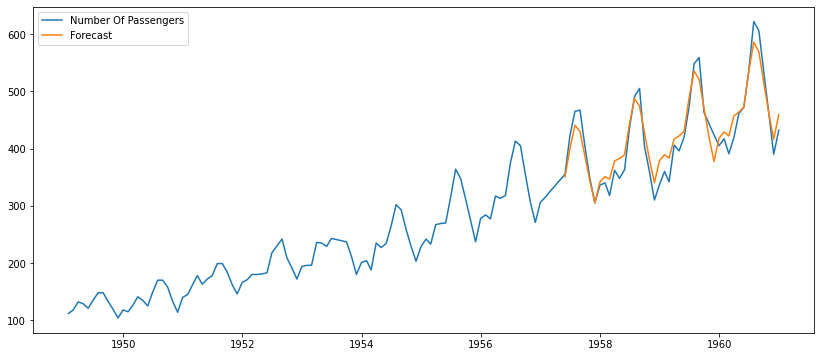

In [151]:
df_copy["Forecast_SARIMA"] = model2_fit.predict(start=100, end=144, dynamic=True)
plt.figure(figsize=(14,6))
plt.plot(df_copy[["Passengers","Forecast_SARIMA"]])
plt.legend(labels=["Number Of Passengers","Forecast"])

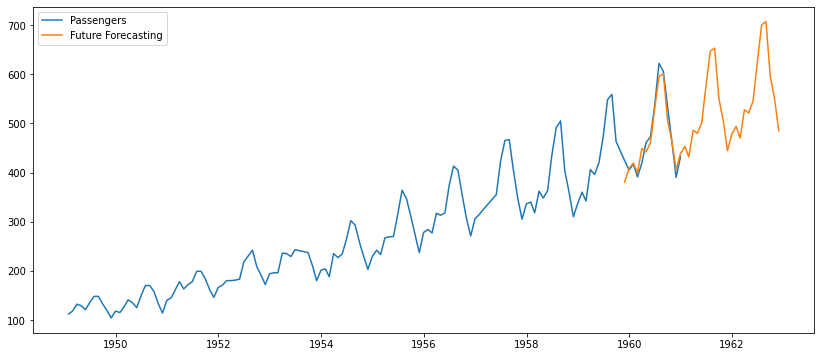

In [152]:
from pandas.tseries.offsets import DateOffset
#using "for" loop we are adding some additional data for prediction purpose
future_dates=[df_copy.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_copy.columns)
future_datest_df.tail()
#Concatenating the present and future dataset
future_df=pd.concat([df_copy,future_datest_df])
future_df['Future_forecast'] = model2_fit.predict(start = 130, end = 200, dynamic= True) 
plt.figure(figsize=(14,6))
plt.plot(future_df[['Passengers', 'Future_forecast']])
plt.legend(labels=["Passengers","Future Forecasting"])

In [153]:
strt='1960-01-01'
end='1960-12-31'
df=future_df[(future_df.index>strt) &(future_df.index<=end) ]
df

,Passengers,Forecast_SARIMA,Future_forecast
1960-01-31,417,429.036798,419.205239
1960-02-29,391,421.931033,398.840830
1960-03-31,419,457.159356,448.656610
1960-04-30,461,463.47125,441.806198
1960-05-31,472,472.527813,460.395176
1960-06-30,535,534.711427,528.954496
1960-07-31,622,585.723749,595.479100
1960-08-31,606,569.260858,600.875647
1960-09-30,534,515.258113,506.384089
1960-10-31,462,461.369304,463.103586


In [28]:
# Considering seasonality
SARIMA_model = pm.auto_arima(df_copy["Passengers"], 
                         start_p=1, 
                         start_q=1,
                         test='adf',
                         max_p=1, 
                         max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         seasonal=True, #set to seasonal
                         d=1, 
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [61]:
#forecast(SARIMA_model)

In [ ]:
'''
Interpolate

'''

In [41]:
## Forcasting for Log transformed dataframe 

In [200]:
# Considering seasonality 
SARIMA_model = pm.auto_arima(log_df["Passengers"], 
                         start_p=1, 
                         start_q=1,
                         test='adf',
                         max_p=1, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=1, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [201]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted,_ = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_copy.index[-1], periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    # Plot
    plt.figure(figsize=(20,8))
    plt.plot(log_df["Passengers"], color='blue')
    plt.plot(fitted_series, color='red')
    plt.title("ARIMA - Forecast of Airline Passengers")
    plt.show()

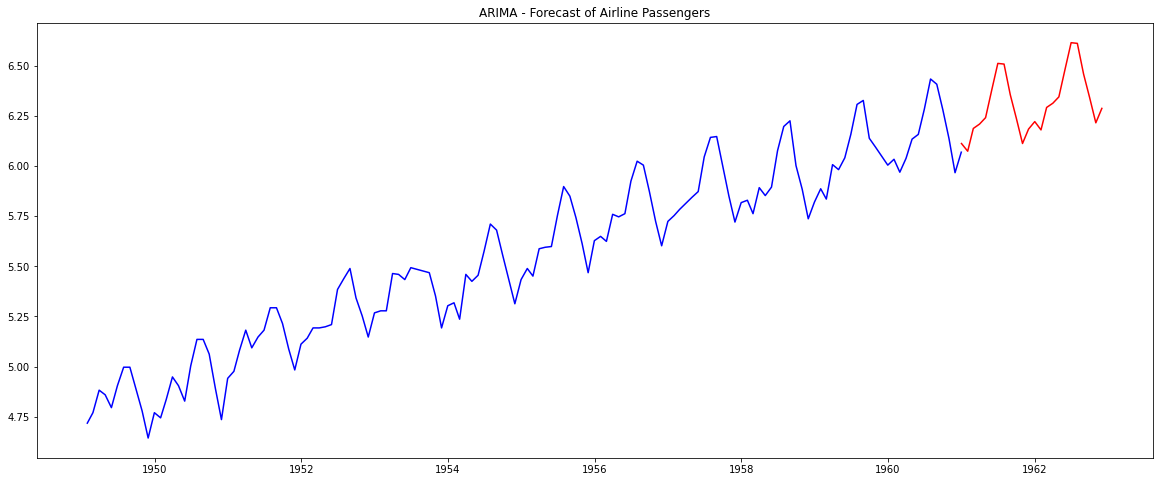

In [202]:
forecast(SARIMA_model)

In [203]:
mape=mean_absolute_percentage_error(df['Passengers'],df['Future_forecast'])
print("MAPE:",mape)
rmse=sqrt(mean_squared_error(df['Passengers'],df['Future_forecast']))
print("RMSE:",rmse)

MAPE: 2.782912848970025
RMSE: 16.499679568616926


In [ ]:
MAPE: 2.782912848970025
RMSE: 16.499679568616926
